<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/%ED%8F%89%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np

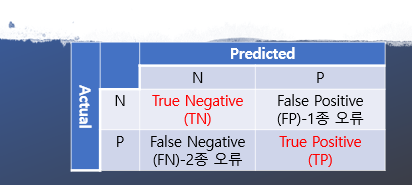

In [ ]:
#titanic
'''df=pd.read_csv('titanic.csv')
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']
data['Sex']=pd.get_dummies(data['Sex'])['female'].values
x_train,x_test, y_train, y_test = train_test_split(data, label)
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)'''

# 정확도(Accuracy)

---
(TN+TP) / (TP+TN+FP+FT)


In [25]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression

In [26]:
df=pd.read_csv("titanic.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [27]:
class MyDummyClassifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        pred = np.zeros((x.shape[0],1))
        for i in range(x.shape[0]):
            if x['Sex'].iloc[i]==0:
                pred[i]=0
            else:
                pred[i]=1
        return pred


In [28]:
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']

In [29]:
data['Sex']=pd.get_dummies(data['Sex'])['female'].values

<ipython-input-29-16ae76377c22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=pd.get_dummies(data['Sex'])['female'].values


In [30]:
x_train,x_test, y_train, y_test = train_test_split(data, label)
model=MyDummyClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
print("score:",accuracy_score(y_test,pred))


score: 0.7892376681614349


In [31]:
digits=load_digits()
np.unique(digits.target,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [32]:
data=digits.data
label=(digits.target==7).astype(int)
np.unique(label,return_counts=True)

(array([0, 1]), array([1618,  179]))

In [33]:
class MySecondClassifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)


In [34]:
x_train,x_test, y_train, y_test = train_test_split(data,label)
model= MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("score:",accuracy_score(y_test,pred))


score: 0.8911111111111111


In [35]:
model= LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
print("score:",accuracy_score(y_test,pred))


score: 0.9977777777777778


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 오차행렬(Confusion Matrix)

---

In [36]:
from sklearn.metrics import confusion_matrix


In [37]:
x_train,x_test, y_train, y_test = train_test_split(data,label)
model= MySecondClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)

confusion_matrix(y_test,pred)

array([[407,   0],
       [ 43,   0]])

In [38]:
model= LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

confusion_matrix(y_test,pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[406,   1],
       [  3,  40]])

# 정밀도와 재현율
(Precision , Recall)
---
Precision = TP / (FP+TP) \
Recall = TP / (FN + TP)

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import Binarizer
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


In [40]:
def model_eval(actual,pred,print_flag=True):
  confusion = confusion_matrix(actual,pred)
  accuracy = accuracy_score(actual,pred)
  precision = precision_score(actual,pred)
  recall = recall_score(actual,pred)

  if print_flag:
    print("confusion : ",confusion)
    print("accuracy : ",accuracy)
    print("precision : ",precision)
    print("recall : ", recall)

  return confusion,accuracy,precision,recall


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)
co,ac,pr,re=model_eval(y_test,pred)

In [ ]:
#titanic
df=pd.read_csv('titanic.csv')
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']
data['Sex']=pd.get_dummies(data['Sex'])['female'].values

In [43]:
x_train,x_test, y_train, y_test = train_test_split(data, label)


In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)
re=model_eval(y_test,pred)

In [ ]:
model=MyDummyClassifier()
model.fit(x_train,y_train)
pred=model.predict(x_test)
re=model_eval(y_test,pred)

In [46]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred_proba=model.predict_proba(x_test) #확률


In [ ]:
ct=0.5
pp1=pred_proba[:,1].reshape(-1,1)
biz=Binarizer(threshold=ct).fit(pp1)
cp=biz.transform(pp1)
re1=model_eval(y_test,cp)

In [48]:
def get_eval_by_thresholds(y_test,pp,thresholds):
  pp2=pp[:,1].reshape(-1,1)
  for threshold in thresholds:
      binar = Binarizer(threshold=threshold)
      pv = binar.fit_transform(pp2)
      _,acc,prec,recall =model_eval(y_test,pv,False)
      print(f"[{threshold}]")
      print(f'acc:{acc:.3f} prec:{prec:.3f} recall:{recall:.3f} \n')

In [ ]:
ths=[0.4,0.5,0.55,0.6]
get_eval_by_thresholds(y_test,pred_proba,ths)

In [ ]:
#titanic
df=pd.read_csv('titanic.csv')
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']
data['Sex']=pd.get_dummies(data['Sex'])['female'].values
x_train,x_test, y_train, y_test = train_test_split(data, label)


In [67]:
model=LogisticRegression()
model.fit(x_train,y_train)
pp1=model.predict_proba(x_test)
ppc1=pp1[:,1]

In [68]:
prec,rec,thres = precision_recall_curve(y_test,ppc1)

In [83]:
thr_index = np.arange(0,thres.shape[0],15)
thr_index


print("threshold:",np.round(thres[thr_index],2))
print("(정밀도)precison:",np.round(prec[thr_index],2))
print("(재현율)recall  :",np.round(rec[thr_index],2))


threshold: [0.03 0.12 0.12 0.24 0.4  0.45 0.58 0.63 0.81 0.92]
(정밀도)precison: [0.41 0.43 0.52 0.58 0.69 0.77 0.87 0.96 1.   1.  ]
(재현율)recall  : [1.   0.97 0.91 0.84 0.77 0.7  0.65 0.49 0.27 0.1 ]


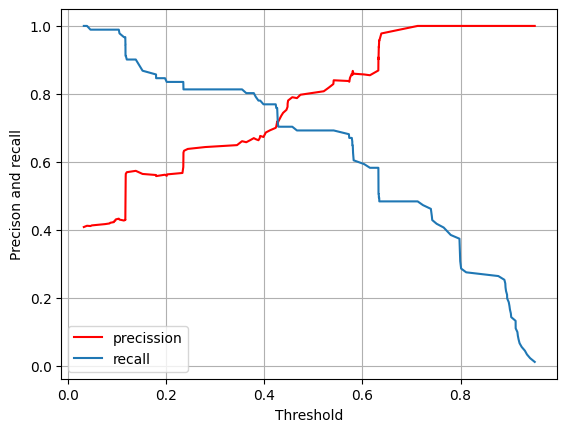

123


In [94]:
last = thres.shape[0]
plt.plot(thres,prec[0:last],'r-',label='precission')
plt.plot(thres,rec[0:last],label='recall')
plt.grid()
plt.xlabel('Threshold');plt.ylabel('Precison and recall')
plt.legend()
plt.show()


# F1 스코어

---



In [114]:
from sklearn.metrics import f1_score


In [115]:
#titanic
df=pd.read_csv('titanic.csv')
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']
data['Sex']=pd.get_dummies(data['Sex'])['female'].values
x_train,x_test, y_train, y_test = train_test_split(data, label)
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)

<ipython-input-115-1d998ef0e932>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=pd.get_dummies(data['Sex'])['female'].values


In [116]:
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_test)


In [117]:
f1=f1_score(y_test,pred)
f1

0.7515151515151515

In [118]:
def get_model_eval(actual,pred):
    con = confusion_matrix(actual,pred)
    acc = accuracy_score(actual,pred)
    pre = precision_score(actual,pred)
    rec = recall_score(actual,pred)
    f1 = f1_score(actual,pred)
    print('오차 행렬')
    print(con)
    print(f"정확도:{acc:6.4f} 정밀도:{pre:6.4f} 재현율:{rec:6.4f} F1:{f1:6.4f}\n")


In [119]:
get_model_eval(y_test,pred)

오차 행렬
[[120  20]
 [ 21  62]]
정확도:0.8161 정밀도:0.7561 재현율:0.7470 F1:0.7515



In [120]:
def get_eval_by_thresholds2(y_test,pp,thresholds):
  pp2=pp[:,1].reshape(-1,1)
  for threshold in thresholds:
      binar = Binarizer(threshold=threshold)
      pv = binar.fit_transform(pp2)
      print(f"<{threshold}>")
      get_model_eval(y_test,pv)

In [121]:
thresholds = [0.4, 0.45, 0.5, 0.55, 0.55, 0.6]
model=LogisticRegression()
model.fit(x_train,y_train)
pred_proba = model.predict_proba(x_test)
get_eval_by_thresholds2(y_test,pred_proba,thresholds)


<0.4>
오차 행렬
[[106  34]
 [ 13  70]]
정확도:0.7892 정밀도:0.6731 재현율:0.8434 F1:0.7487

<0.45>
오차 행렬
[[115  25]
 [ 20  63]]
정확도:0.7982 정밀도:0.7159 재현율:0.7590 F1:0.7368

<0.5>
오차 행렬
[[120  20]
 [ 21  62]]
정확도:0.8161 정밀도:0.7561 재현율:0.7470 F1:0.7515

<0.55>
오차 행렬
[[121  19]
 [ 23  60]]
정확도:0.8117 정밀도:0.7595 재현율:0.7229 F1:0.7407

<0.55>
오차 행렬
[[121  19]
 [ 23  60]]
정확도:0.8117 정밀도:0.7595 재현율:0.7229 F1:0.7407

<0.6>
오차 행렬
[[126  14]
 [ 26  57]]
정확도:0.8206 정밀도:0.8028 재현율:0.6867 F1:0.7403



# ROC곡선과 AUC

---






In [128]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [124]:
df=pd.read_csv('titanic.csv')
data=df[['Pclass','Sex','SibSp','Parch','Fare']]
label=df['Survived']
data['Sex']=pd.get_dummies(data['Sex'])['female'].values
x_train,x_test, y_train, y_test = train_test_split(data, label)
model=LogisticRegression()
model.fit(x_train,y_train)
pred_proba=model.predict_proba(x_test)
pp1=pred_proba[:,1].reshape(-1,1)


<ipython-input-124-5b6d451d31ac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sex']=pd.get_dummies(data['Sex'])['female'].values


In [125]:
fprs, tprs, thresholds = roc_curve(y_test,pp1)
thr_index = np.arange(1,thresholds.shape[0],5)
print("인덱스:",thr_index)
print("임곗값:",np.round(thresholds[thr_index],2))
print("FRP:",np.round(fprs[thr_index],2))
print("TRP:",np.round(tprs[thr_index],2))


인덱스: [ 1  6 11 16 21 26 31 36 41 46 51 56 61 66 71 76 81 86]
임곗값: [0.95 0.88 0.62 0.61 0.56 0.48 0.42 0.4  0.4  0.23 0.21 0.17 0.11 0.11
 0.1  0.1  0.08 0.04]
FRP: [0.   0.01 0.03 0.05 0.09 0.1  0.15 0.18 0.22 0.27 0.38 0.45 0.61 0.72
 0.8  0.85 0.89 0.98]
TRP: [0.01 0.24 0.44 0.54 0.59 0.66 0.68 0.73 0.77 0.8  0.82 0.84 0.89 0.92
 0.92 0.94 0.98 1.  ]


In [126]:
def roc_curve_plot(y_test,pred):
    fprs, tprs, thresholds = roc_curve(y_test,pred)
    plt.plot(fprs,tprs,label='ROC')
    plt.plot([0,1],[0,1],'k--',label='Random')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.legend()
    plt.show()


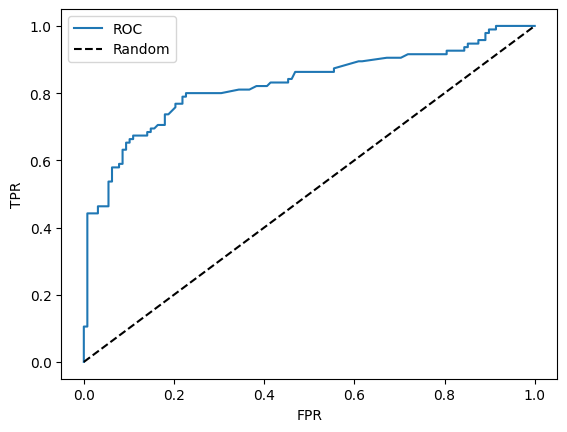

In [127]:
roc_curve_plot(y_test,pp1)

In [129]:
roc_auc_score(y_test,pp1)

0.8258223684210526